# Types of encoding categorical Features

1. Label encoder + One Hot Encoding
2. DictVectorizer
3. Pandas - Get Dummies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# DictVectorizer

data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [2]:
raw_data = {
  'price':[850000,700000,650000,600000] ,
  'rooms':[4,3,3,2],
  'neighbourhood':['Queen Anne','Fremont','Wallingford','Fremont']  
}

In [3]:
DataDf = pd.DataFrame(raw_data)

In [4]:
# Turn the DataFrame into Dictionary
Datadict = DataDf.to_dict(orient='records')
Datadict

[{'price': 850000, 'rooms': 4, 'neighbourhood': 'Queen Anne'},
 {'price': 700000, 'rooms': 3, 'neighbourhood': 'Fremont'},
 {'price': 650000, 'rooms': 3, 'neighbourhood': 'Wallingford'},
 {'price': 600000, 'rooms': 2, 'neighbourhood': 'Fremont'}]

In [5]:
from sklearn.feature_extraction import DictVectorizer

In [6]:
vec = DictVectorizer(dtype=int,sparse=False,separator='_')

In [7]:
DictConverted = vec.fit_transform(Datadict)
FeatureNames = vec.feature_names_

In [8]:
ConvertedDf = pd.DataFrame(DictConverted,columns=FeatureNames)

In [9]:
ConvertedDf

,neighbourhood_Fremont,neighbourhood_Queen Anne,neighbourhood_Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


# One Hot Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(DataDf.neighbourhood)

array([1, 0, 2, 0])

In [11]:
le.classes_

array(['Fremont', 'Queen Anne', 'Wallingford'], dtype=object)

In [12]:
DataDf['neighbourhood'] =le.fit_transform(DataDf.neighbourhood)
DataDf

,price,rooms,neighbourhood
0,850000,4,1
1,700000,3,0
2,650000,3,2
3,600000,2,0


In [13]:
# One hot encoding

from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(categorical_features=[2],sparse=False,dtype=int)

In [14]:
OHE.fit_transform(DataDf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

# Pandas : Using Get Dummies

In [15]:
NewDF = pd.get_dummies(DataDf,columns=['neighbourhood'])

In [16]:
NewDF

,price,rooms,neighbourhood_0,neighbourhood_1,neighbourhood_2
0,850000,4,0,1,0
1,700000,3,1,0,0
2,650000,3,0,0,1
3,600000,2,1,0,0


In [45]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100,3)
X.shape

(100, 3)

In [49]:
X.shape

(100, 3)

In [50]:
from sklearn.datasets.samples_generator import make_blobs

In [53]:
X,y = make_blobs(n_samples=100,centers=2,cluster_std=0.60,random_state=0)

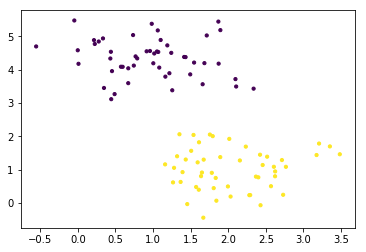

In [61]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [58]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])